# Credit One Customer Default Identification
**Business Problem:**
An increase in customer default rates is bad for Credit One since its business is approving customers for loans in the first place. This is likely to result in the loss of Credit One's business customers.

**Business Questions to Investigate:**
* How do you ensure that customers can/will pay their loans?
* Can we approve customers with high certainty?

## Credit One Data Preparation & Exploration

**Setup & Import Modules**

* Pandas is for data structures and operations data manipulation & analysis
* Numpy is for multidimensional array-processing
* Matplotlib is for plotting
* Seaborn is for visualization based on matplotlib

In [121]:
# Setup & Import Modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import Data
credit = pd.read_csv(r'...')     

In [5]:
# Check the first 5 rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [58]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


* No missing data fields
* 30,000 records
* 23 predictor variables
* 1 outcome variable: DEFAULT for Payment Default Status Binary
* Data Types: Integers

**Change select features' data type from integers to category**
* Sex, Education, Marriage, Past Payment Status (PAY_0...PAY_6) and Default Payment (DEFAULT) are categorical data

In [7]:
for col in['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']:credit[col]=credit[col].astype('category')

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null category
EDUCATION    30000 non-null category
MARRIAGE     30000 non-null category
AGE          30000 non-null int64
PAY_0        30000 non-null category
PAY_2        30000 non-null category
PAY_3        30000 non-null category
PAY_4        30000 non-null category
PAY_5        30000 non-null category
PAY_6        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null category
dtypes: cat

**Exploratory Data Analysis**

In [9]:
# Determine Header Names
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


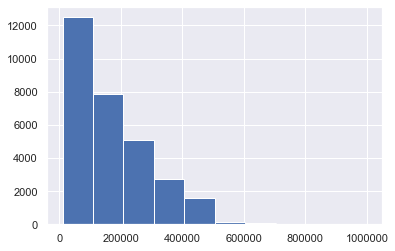

In [37]:
# histogram of Limit Balance
plt.hist(credit['LIMIT_BAL'])
plt.show()

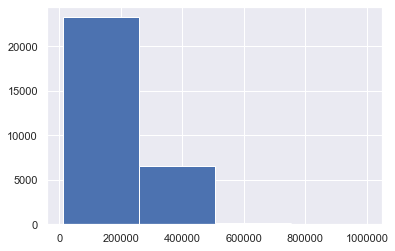

In [39]:
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

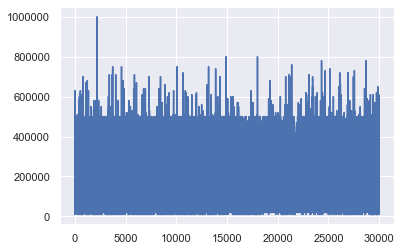

In [45]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [105]:
# Age of clients
# Average and median age of clients are 35 and 34 years old, respectively
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distribution of Clients' Ages")

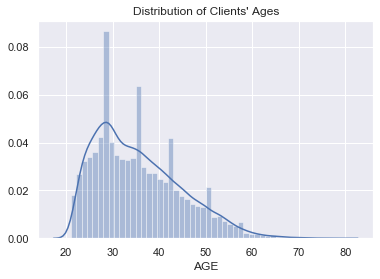

In [110]:
# Distribution of age, with an overlay of a density plot
age = credit['AGE'].dropna()
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Clients' Ages")

In [62]:
# Number of clients who default on payment
credit.groupby('DEFAULT')['DEFAULT'].count()

DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64

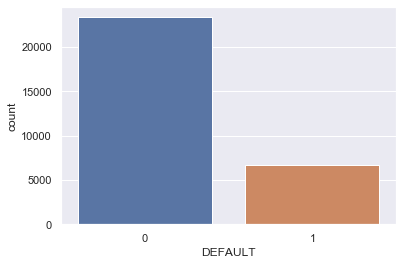

In [42]:
# visualize number of of clients who default payment
sns.countplot(x='DEFAULT', data=credit)
plt.show()

In [63]:
# Number of clients by gender: male (1) and female (2)
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

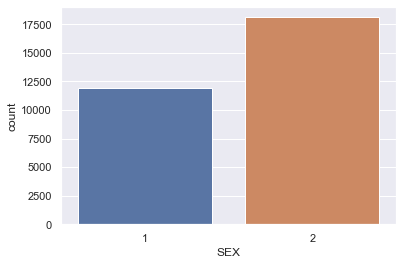

In [44]:
# visualize number of clients by sex
# more male (2) than female (1) clients
sns.countplot(x='SEX', data=credit)
plt.show()

In [10]:
# Number of clients by education status
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

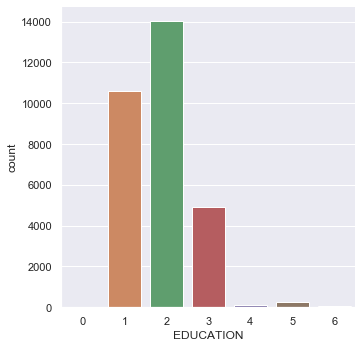

In [11]:
# visualize clients' education status
# very few "other" education status (0, 4-6)
sns.catplot(x="EDUCATION", kind="count", data=credit)
plt.show()

In [64]:
# Number of clients by marital status
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

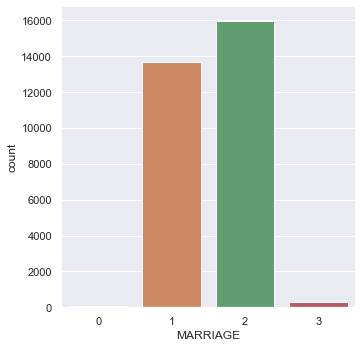

In [88]:
# visualize clients' marital status
# divorce (2) is highest, followed by married (1)
sns.catplot(x="MARRIAGE", kind="count", data=credit)
plt.show()

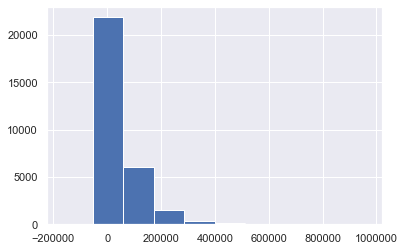

In [124]:
# histogram of Bill Amount
plt.hist(credit['BILL_AMT1'])
plt.show()

## Correlation

**No Correlation**
* Education & Bill_Amount 4-6

**Strong Correlation**
* Between Bill_Amount

In [128]:
# Correlation Coefficient Matrix
corrMat = credit.corr()
print(corrMat)

                 ID  LIMIT_BAL  EDUCATION       AGE  BILL_AMT1  BILL_AMT2  \
ID         1.000000   0.026179   0.039177  0.018678   0.019389   0.017982   
LIMIT_BAL  0.026179   1.000000  -0.219161  0.144713   0.285430   0.278314   
EDUCATION  0.039177  -0.219161   1.000000  0.175061   0.023581   0.018749   
AGE        0.018678   0.144713   0.175061  1.000000   0.056239   0.054283   
BILL_AMT1  0.019389   0.285430   0.023581  0.056239   1.000000   0.951484   
BILL_AMT2  0.017982   0.278314   0.018749  0.054283   0.951484   1.000000   
BILL_AMT3  0.024354   0.283236   0.013002  0.053710   0.892279   0.928326   
BILL_AMT4  0.040351   0.293988  -0.000451  0.051353   0.860272   0.892482   
BILL_AMT5  0.016705   0.295562  -0.007567  0.049345   0.829779   0.859778   
BILL_AMT6  0.016730   0.290389  -0.009099  0.047613   0.802650   0.831594   
PAY_AMT1   0.009742   0.195236  -0.037456  0.026147   0.140277   0.280365   
PAY_AMT2   0.008406   0.178408  -0.030038  0.021785   0.099355   0.100851   

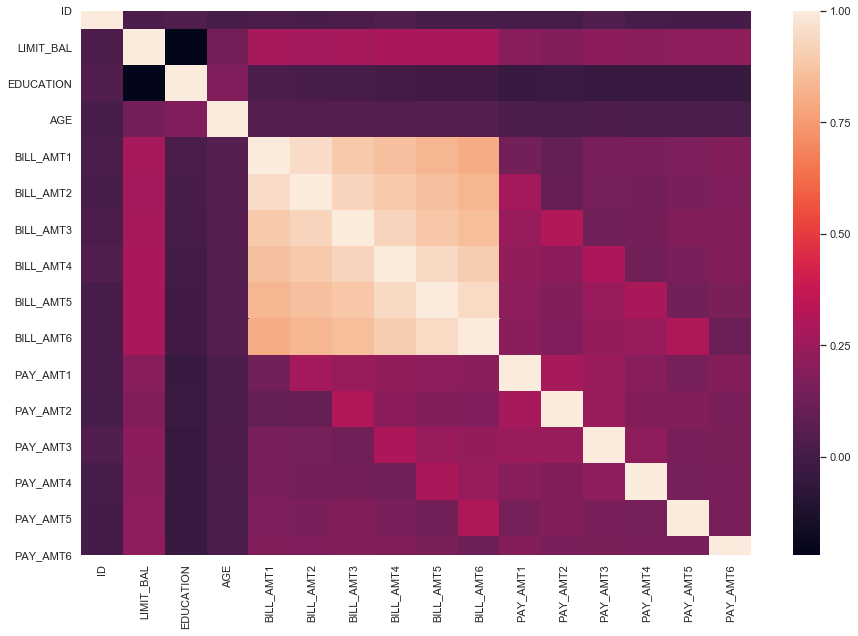

In [157]:
#Plot heatmap of feature correlation
plt.figure(figsize=(15,10))
sns.heatmap(credit.corr())
plt.show()

## Covariance

**Negative Covariance**
* Education & Limit_Balance
* Education & Bill_Amount 4-6
* Education & Pay_Amount

**Positive Covariance**
* All other variable combinations

In [132]:
# Covariance Matrix
covMat = credit.cov()
print(covMat)

                     ID     LIMIT_BAL     EDUCATION            AGE  \
ID         7.500250e+07  2.941664e+07    268.154338    1491.057019   
LIMIT_BAL  2.941664e+07  1.683446e+10 -22474.028945  173076.722569   
EDUCATION  2.681543e+02 -2.247403e+04      0.624651       1.275380   
AGE        1.491057e+03  1.730767e+05      1.275380      84.969755   
BILL_AMT1  1.236447e+07  2.727020e+09   1372.377644   38172.933546   
BILL_AMT2  1.108392e+07  2.570130e+09   1054.657595   35613.657962   
BILL_AMT3  1.462688e+07  2.548533e+09    712.664124   34334.251320   
BILL_AMT4  2.248126e+07  2.453926e+09    -22.948827   30453.108180   
BILL_AMT5  8.795803e+06  2.331481e+09   -363.577664   27654.067800   
BILL_AMT6  8.628506e+06  2.243837e+09   -428.274232   26137.648547   
PAY_AMT1   1.397501e+06  4.195711e+08   -490.330155    3992.041735   
PAY_AMT2   1.677383e+06  5.333504e+08   -547.005021    4626.861549   
PAY_AMT3   5.969803e+06  4.801180e+08   -555.834305    4746.824393   
PAY_AMT4   1.057334e

## Visualize Variables against Payment Default

In [70]:
# Number of clients by gender who default on payment
credit.groupby(['DEFAULT', 'SEX'])['DEFAULT'].count()

DEFAULT  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
Name: DEFAULT, dtype: int64

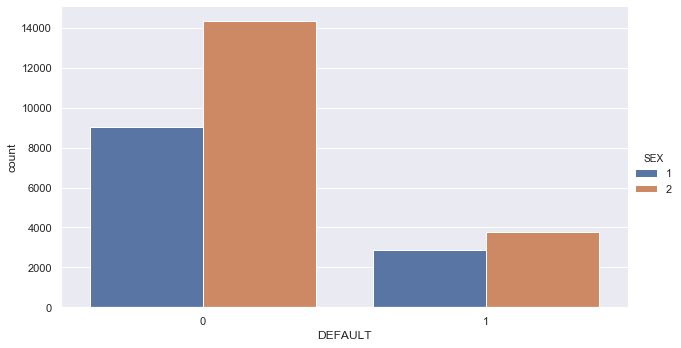

In [74]:
# Visualize default status by gender
g = sns.catplot('DEFAULT', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('DEFAULT')
plt.show()

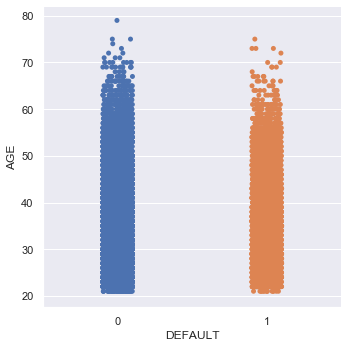

In [85]:
# visualize default status by age
# default status seems to be smilar across age groups
sns.catplot(x='DEFAULT', y='AGE', data=credit)
plt.show()

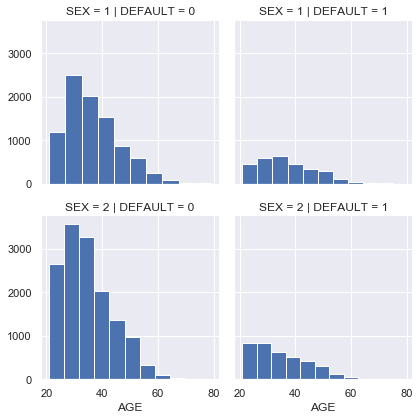

In [168]:
g = sns.FacetGrid(credit, col='DEFAULT', row = 'SEX')
g.map(plt.hist, 'AGE')

In [69]:
# Number of clients by education who default on payment
credit.groupby(['DEFAULT', 'EDUCATION'])['DEFAULT'].count()

DEFAULT  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
Name: DEFAULT, dtype: int64

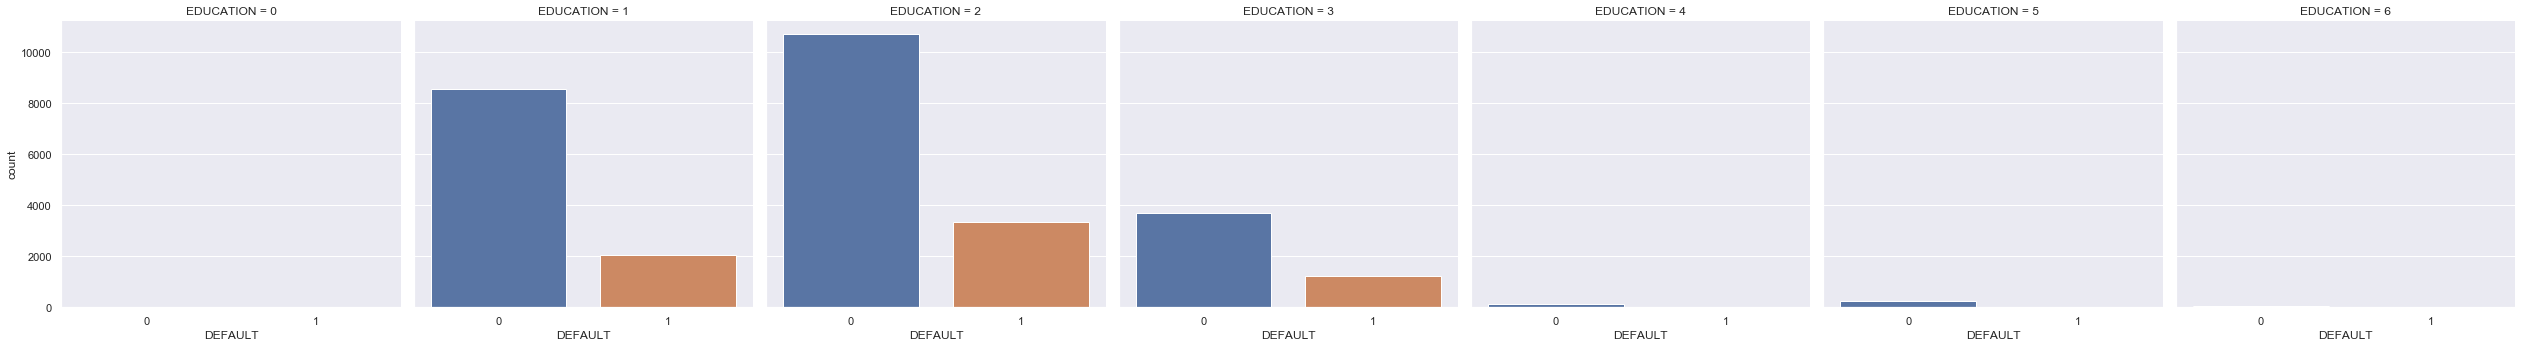

In [87]:
# visualize clients' education level vs default
# University (2) Education has the greatest number of Defaults (1)
sns.catplot(x='DEFAULT', col='EDUCATION', kind='count', data=credit)
plt.show()

In [68]:
# Number of clients by marriage who default on payment
credit.groupby(['DEFAULT', 'MARRIAGE'])['DEFAULT'].count()

DEFAULT  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
Name: DEFAULT, dtype: int64

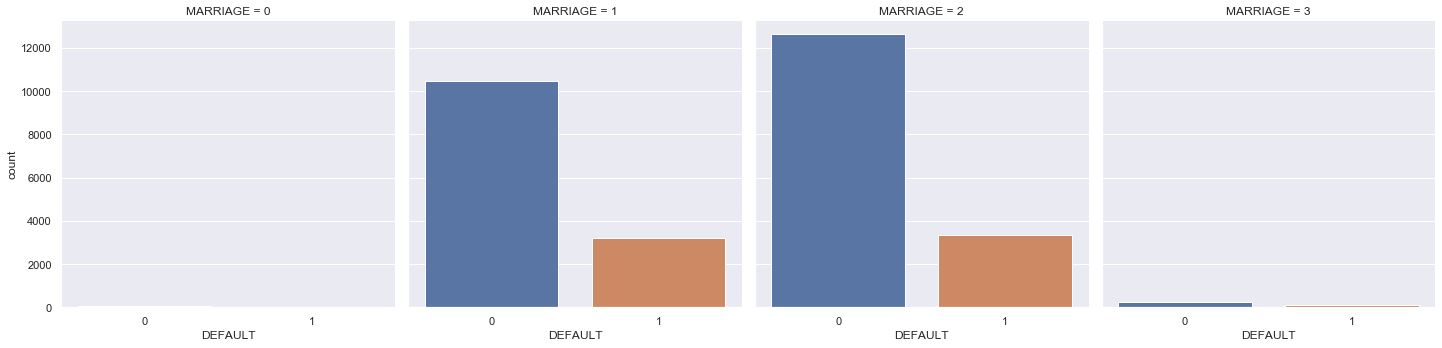

In [89]:
# visualize marital status vs default
sns.catplot(x='DEFAULT', col='MARRIAGE', kind='count', data=credit)
plt.show()

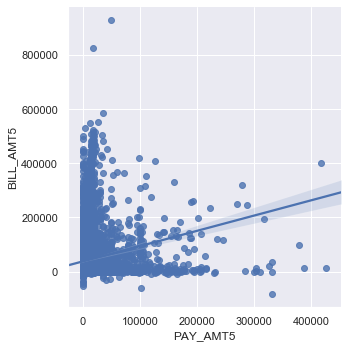

In [145]:
# linear plot of Pay Amount vs Bill Amount
# A positive correlation between Pay & Bill Amounts
sns.lmplot(x="PAY_AMT5", y="BILL_AMT5", data=credit)
plt.show()

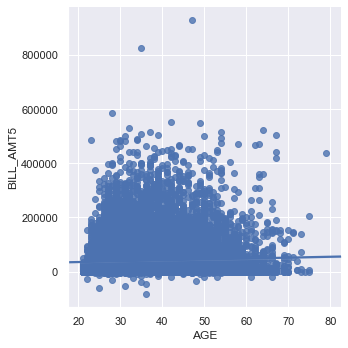

In [147]:
# linear plot of Age vs Bill Amount
# No strong correlation between Age & Bill Amounts
sns.lmplot(x="AGE", y="BILL_AMT5", data=credit)
plt.show()

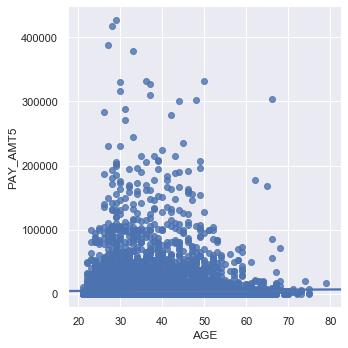

In [149]:
# linear plot of Age vs Pay Amount
# No strong correlation between Age & Pay Amounts
sns.lmplot(x="AGE", y="PAY_AMT5", data=credit)
plt.show()

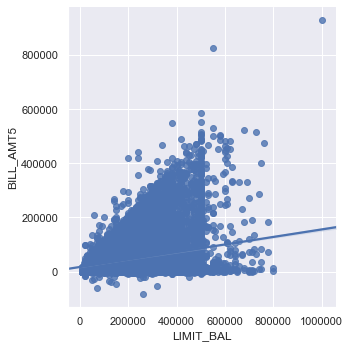

In [150]:
# linear plot of Balance Limit vs Bill Amount
# Positive correlation between Balance Limit & Bill Amounts
sns.lmplot(x="LIMIT_BAL", y="BILL_AMT5", data=credit)
plt.show()

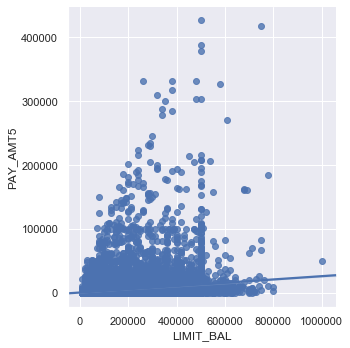

In [153]:
# linear plot of Balance Limit vs Pay Amount
# Positive correlation between Balance Limit & Pay Amounts
sns.lmplot(x="LIMIT_BAL", y="PAY_AMT5", data=credit)
plt.show()

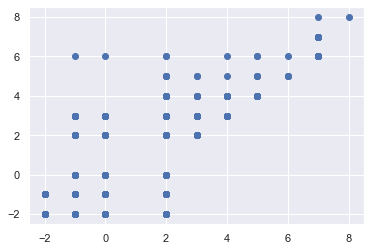

In [91]:
# scatterplot for Pay Comparison
# a correlation between past payment exists when it it is when close months
x = credit['PAY_5']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

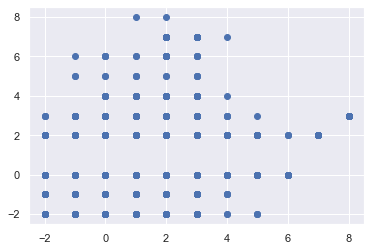

In [92]:
# scatterplot for Pay Comparison
# a correlation between past payment exists when it it is not close months
x = credit['PAY_0']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

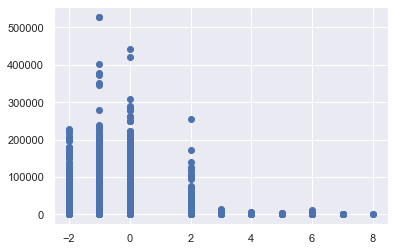

In [102]:
# scatterplot for past payment versus payment amount
# High payment amount does not seems to be correlated with payment delays (2mo delay and beyond).  
x = credit['PAY_6']
y = credit['PAY_AMT6']
plt.scatter(x,y)
plt.show()

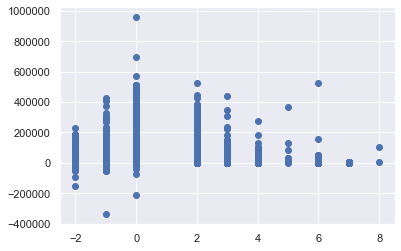

In [104]:
# scatterplot for past payment versus bill amount
# High bill amount does not seems to be correlated with significant payment delays (2mo delay and beyond).  
x = credit['PAY_6']
y = credit['BILL_AMT6']
plt.scatter(x,y)
plt.show()

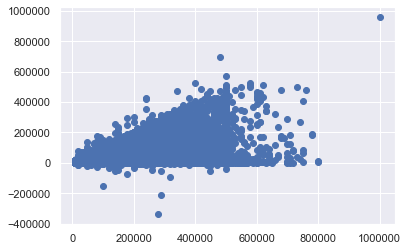

In [115]:
# scatterplot for balance limit versus bill amount
# Balance Limit seems to be positively correlated with bill amount
x = credit['LIMIT_BAL']
y = credit['BILL_AMT6']
plt.scatter(x,y)
plt.show()

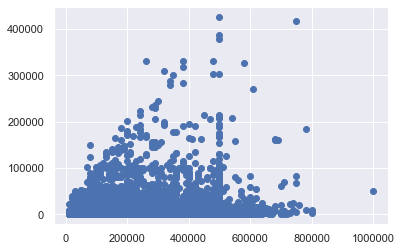

In [120]:
# scatterplot for balance limit versus bill amount
# Balance Limit seems to have positive correlation with pay amount
x = credit['LIMIT_BAL']
y = credit['PAY_AMT5']
plt.scatter(x,y)
plt.show()

## Data Transformation
### Data Cleaning
* Education Feature has 1 = graduate, 2 = university, 3 = high.  0, 4-6 should be classified as other (4) since low count
* Marriage Feature has 1 = married, 2 = single, 0 & 3 should be classified as other (3) since low count 
* Past Payment Feature (PAY_X)  can group no consumer (-2), paid full (-1) and revolving credit (0) as same category (0)

In [15]:
fil = (credit.EDUCATION ==5) | (credit.EDUCATION == 6) | (credit.EDUCATION == 0)
credit.loc[fil, 'EDUCATION'] = 4
credit.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
6        0
5        0
0        0
Name: EDUCATION, dtype: int64

In [16]:
credit['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
6        0
5        0
0        0
Name: EDUCATION, dtype: int64

In [18]:
credit.loc[credit.MARRIAGE ==0, 'MARRIAGE']=3
credit.MARRIAGE.value_counts()

2    15964
1    13659
3      377
0        0
Name: MARRIAGE, dtype: int64

In [22]:
fil = (credit.PAY_0 == -1) | (credit.PAY_0 == -2)
credit.loc[fil,'PAY_0']=0
credit.PAY_0.value_counts()
fil = (credit.PAY_2 == -1) | (credit.PAY_2 == -2)
credit.loc[fil,'PAY_2']=0
credit.PAY_2.value_counts()
fil = (credit.PAY_3 == -1) | (credit.PAY_3 == -2)
credit.loc[fil,'PAY_3']=0
credit.PAY_3.value_counts()
fil = (credit.PAY_4 == -1) | (credit.PAY_4 == -2)
credit.loc[fil,'PAY_4']=0
credit.PAY_4.value_counts()
fil = (credit.PAY_5 == -1) | (credit.PAY_5 == -2)
credit.loc[fil,'PAY_5']=0
credit.PAY_5.value_counts()
fil = (credit.PAY_6 == -1) | (credit.PAY_6 == -2)
credit.loc[fil,'PAY_6']=0
credit.PAY_6.value_counts()

 0    26921
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
-1        0
-2        0
Name: PAY_6, dtype: int64

In [23]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [25]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

### One Hot Encoding for Categorical Variables
* While decision tree algorithms can work with categorical data directly, many machine learning algorithms cannot
* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.
* For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. The risk of using integer encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)
* In this situation one-hot encoding applied can be applied to the integer representation, so that the integer encoded variable is removed and a new binary variable is added for each unique integer value.
* The following category variables need to undergo data transformation: 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
credit.shape

(30000, 25)

In [27]:
credit.columns= credit.columns.map(str.lower)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')


In [28]:
credit.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Feature Scaling for Numerical Variables
* This dataset contains numerical variables highly varying in magnitudes, units and ranges. EX: Age vs Bill_Amount
* Many machine learning algorithms consider only the magnitude of the variables and not its units (e.g., kNN). The risk is that that variables with high magnitudes (Bill_Amount, Pay_Amount, Limit_Balance) will be more heavily factored that variables with low magnitude (Age)
* To prevent this skewing, we need scale the data to the same level of magnitude.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler(feature_range=(-3,3))

In [50]:
Var_Scale = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
credit[Var_Scale] = scaler.fit_transform(credit[Var_Scale].values.reshape(-1,1)) # did not run. error

In [ ]:
credit[Var_Scale] = credit[Var_Scale].apply(lambda x : (x-np.mean(x))/np.std(x)) # did not run. error

# Build & Evaluate Models
* feature selection and model building through the use of the Python module called Sci-Kit Learn
* this will be a classification model to predict default payment status

## Import the necessary models for classification prediction modeling

In [13]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

**Select Data**

In [56]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id           30000 non-null int64
limit_bal    30000 non-null int64
sex          30000 non-null category
education    30000 non-null category
marriage     30000 non-null category
age          30000 non-null int64
pay_0        30000 non-null category
pay_2        30000 non-null category
pay_3        30000 non-null category
pay_4        30000 non-null category
pay_5        30000 non-null category
pay_6        30000 non-null category
bill_amt1    30000 non-null int64
bill_amt2    30000 non-null int64
bill_amt3    30000 non-null int64
bill_amt4    30000 non-null int64
bill_amt5    30000 non-null int64
bill_amt6    30000 non-null int64
pay_amt1     30000 non-null int64
pay_amt2     30000 non-null int64
pay_amt3     30000 non-null int64
pay_amt4     30000 non-null int64
pay_amt5     30000 non-null int64
pay_amt6     30000 non-null int64
default      30000 non-null category
dtypes: cat

**Build training and testing sets**
* The first 23 features were selected as independent variables (X)
* default as dependent variable (y), the one we need to predict.
* train_test_split() function is used to randomly split training and testing datasets.
* dataset will be split 70/30 for training & test sets

In [58]:
#Features
features = credit.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000,2,2,1,24,2,2,0,0,0,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,0,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,0,0,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [60]:
#select dependent variables
depVar = credit['default']

In [61]:
from sklearn.model_selection import train_test_split

# Use cross validation to establish train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3)

In [62]:
# use the shape function to double check that the split was made as needed:
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [63]:
X_train.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
22623,90000,2,3,1,41,0,0,0,0,0,...,84573,78617,64344,63417,10000,3519,5014,2679,4600,1000
28618,270000,2,4,2,42,0,0,0,0,0,...,9190,2072,637,238,1859,9190,2072,637,238,0
6359,50000,1,1,2,27,0,0,0,0,0,...,19098,3291,1855,540,1762,1144,66,37,158,390
11323,130000,1,3,2,53,0,0,0,0,0,...,1403,5773,2464,2108,6540,1411,5790,2571,2214,4172
19139,260000,2,2,1,37,1,1,0,0,0,...,-15910,-15910,24090,13977,0,0,0,40000,507,656


### Build the Models
* Using the established dependent variable (default; y), training (X_train, y_train) and test (X_test, y_test) sets

**The following 4 algorithms will be used:**
* Logistic Regression
* Random Forest
* kNN
* Gradient Boosting (GBM)
* Support Vector Machine (SVM)

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
modelLogR = LogisticRegression()
modelLogR.fit(X_train,y_train)

C:\Users\exfj4rw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
modelLogR.score(X_train, y_train)

0.7798571428571428

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
modelRF = RandomForestClassifier(n_estimators=100)

In [76]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
modelRF.score(X_train, y_train)

0.9995238095238095

### K-Nearest Neighbor (kNN)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
for i in range(1,5):
    
    modelknn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    modelknn.fit(X_train,y_train)

In [86]:
modelknn.score(X_train, y_train)

0.8163333333333334

### Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
GB = GradientBoostingClassifier()

In [91]:
modelGBM = GB.fit(X_train, y_train)

In [92]:
modelGBM.score(X_train, y_train)

0.8285714285714286

### Support Vector Machine

In [93]:
from sklearn.svm import SVC

In [99]:
modelSVM = SVC()
modelSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
modelSVM.score(X_train, y_train)

0.78

## Cross Validation
### Model Selection

* 3-fold cross validation; note default if none is 5-fold CV
* The first value is the score array for the test cores on each cv split
* The second value is the time for fitting the estimator on the train set for each cv split
* The third value is the time for scoring the estimator on the test set for each cv split
* Gradient Boosting (GBM) had the highest score, so it was the best performing model among the four models tested

In [103]:
#Random Forest Classification Model Fitting & Scoring
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv=3))
modelRF.score(X_train,y_train)

[0.81371429 0.81357143 0.81814286]


0.9995238095238095

In [104]:
#kNN Model Fitting & Scoring
modelknn.fit(X_train,y_train)
print(cross_val_score(modelknn, X_train, y_train, cv=3))
modelknn.score(X_train, y_train)

[0.77128571 0.76585714 0.77142857]


0.8163333333333334

In [106]:
#GBM Model Fitting & Scoring
modelGBM.fit(X_train,y_train)
print(cross_val_score(modelGBM, X_train, y_train, cv=3))
modelGBM.score(X_train, y_train)

[0.82071429 0.819      0.824     ]


0.8285714285714286

In [108]:
#SVM Model Fitting & Scoring
modelSVM.fit(X_train,y_train)
print(cross_val_score(modelSVM, X_train, y_train, cv=3))
modelSVM.score(X_train, y_train)

[0.78       0.77985714 0.77985714]


0.78

#### Making Predictions & Evaluating Results

* Using Gradient Bosting Model previously created
* Prediction will be made using train_test_split method gradient boosting model
* The Confusion Matrix and Classification Report will summarize the prediction findings


In [135]:
# Using train_test_split to predict and show accuracy score & classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3, random_state=42)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, GB.predict(X_test)))

0.821
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [151]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6690,  350],
       [1261,  699]], dtype=int64)

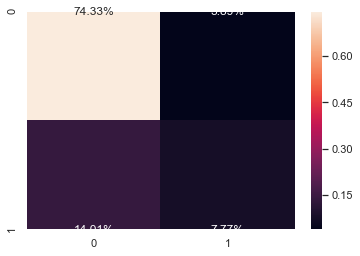

In [165]:
# visualize confusion matrix: True Negative- No Default (74.33%), False Positive- False Default Prediction (14.01%), 
# False Negative- False no-default (3.89%), True Positive- True Default  (7.77%) 

import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%')
plt.show()

In [134]:
GB.feature_importances_

array([0.02844295, 0.00240609, 0.00765432, 0.00465735, 0.00892097,
       0.61127802, 0.07896131, 0.0410828 , 0.01767682, 0.01436784,
       0.0191632 , 0.03128799, 0.00942925, 0.01140578, 0.00474802,
       0.00163711, 0.00572295, 0.02738544, 0.0182218 , 0.02570481,
       0.01041883, 0.00809312, 0.01133324])

* Top 7 most important features are: LIMIT_BAL 1 (0.03), PAY _0 6 (0.611), PAY _2  7 (0.08), PAY _3  8 (0.04), BILL_AMT1 12 (0.03) PAY_AMT1 18 (0.03), PAY_AMT3 20 (0.03)

In [146]:
from sklearn.metrics import plot_confusion_matrix

# Conclusion
## Model Selection (Accuracy %)
### Models' prediction accuracy as to whether a customer is likely to default next month
* Logistic Regression (78%)
* Random Forest (81%)
* kNN, k =5 (77%)
* GBM (83%)
* SVM (78%)

**Gradient Boosting had the highest predictive model accuracy, and is the recommended model.**
**We were able to accuractely predict 74% true-no defaults, 7.8% true defaults. False Default was 14%; False NO-Default was 3.9%).**

## Strongest Predictors of Default
* The repayment status in the previous month (PAY_X)
* The credit given (LIMIT_BAL)
* The amount paid in the previous month (PAY_AMTX)

## Client demographics with the lowest likelihood to default on payment
* female
* higher education
* single
* age = 25-40 years old